# Team Epic 
# Telecommunication - Customer Churn Analysis


## Table of Content

1. [Introduction](#h0) 
2. [Exploratory Data Analysis](#h1)
3. [Data Transformation](#h2)
4. [Data Visualization](#h3)
5. [Feature Selection](#h4)


## Introduction <a class= "anchor" id="h0"></a>
Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Importing the required Liberaries 

In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

## Exploratory Data Analysis <a class= "anchor" id="h1"></a>
#### Loading the Data set

In [108]:
telco_df = pd.read_csv("Customer-Churn-Prediction.csv")

In [109]:
telco_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,NJ,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,OH,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,OK,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,MA,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


#### Description of the data set

In [110]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4232 non-null   object 
 1   account_length                 4216 non-null   float64
 2   area_code                      4234 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4237 non-null   object 
 5   number_vmail_messages          4216 non-null   float64
 6   total_day_minutes              4240 non-null   float64
 7   total_day_calls                4248 non-null   float64
 8   total_day_charge               4242 non-null   float64
 9   total_eve_minutes              4215 non-null   float64
 10  total_eve_calls                4233 non-null   float64
 11  total_eve_charge               4242 non-null   float64
 12  total_night_minutes            4248 non-null   f

_Telco dataset has 20 columns and 4250 observations as shown above._

#### Number of unique values in our dataset

In [111]:
telco_df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1841
total_day_calls                   120
total_day_charge                 1842
total_eve_minutes                1767
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

In [112]:
telco_df.international_plan.unique()

array(['no', 'yes'], dtype=object)

In [113]:
telco_df.voice_mail_plan.unique()

array(['yes', 'no', nan], dtype=object)

In [114]:
telco_df.churn.unique()

array(['no', 'yes', nan], dtype=object)

### Data Transformation <a class= "anchor" id="h2"></a>
Lets convert the categorical variable into  numerical variable to further analysis.

In [115]:
obj_col = ["international_plan", "voice_mail_plan"]
for i in obj_col:
    telco_df[i].replace(to_replace = ["no", "yes"], value = [0, 1], inplace=True)
telco_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107.0,area_code_415,0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,NJ,137.0,area_code_415,0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,OH,84.0,area_code_408,1,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,OK,75.0,area_code_415,1,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,MA,121.0,area_code_510,0,1.0,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


### Hndling missing values
We will use fill method to fill out the missing values

In [116]:
telco_df.isnull().sum()

state                            18
account_length                   34
area_code                        16
international_plan                0
voice_mail_plan                  13
number_vmail_messages            34
total_day_minutes                10
total_day_calls                   2
total_day_charge                  8
total_eve_minutes                35
total_eve_calls                  17
total_eve_charge                  8
total_night_minutes               2
total_night_calls                 5
total_night_charge                7
total_intl_minutes                5
total_intl_calls                 13
total_intl_charge                30
number_customer_service_calls     3
churn                            22
dtype: int64

In [117]:
telco_df.fillna(method ="bfill", inplace = True)

In [118]:
telco_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### Statistical Description of our data


In [119]:
telco_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.084000,39.739837,1.0,73.000,99.00,127.0000,243.00
international_plan,4250.0,0.093176,0.290714,0.0,0.000,0.00,0.0000,1.00
voice_mail_plan,4250.0,0.262118,0.439838,0.0,0.000,0.00,1.0000,1.00
number_vmail_messages,4250.0,7.654588,13.455583,0.0,0.000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.324259,54.146741,0.0,143.300,180.50,216.5750,351.50
total_day_calls,4250.0,99.911529,19.854986,0.0,87.000,100.00,113.0000,165.00
total_day_charge,4250.0,30.641887,9.192148,0.0,24.365,30.67,36.7650,59.76
total_eve_minutes,4250.0,200.349459,50.288271,0.0,166.400,200.80,233.9000,359.30
total_eve_calls,4250.0,100.194824,19.962041,0.0,87.000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.012358,4.272015,0.0,14.100,17.06,19.8700,30.54


### Data Visualization  <a class= "anchor" id="h3"></a>

In [121]:
df_heatmap = telco_df.copy()
df_heatmap["area_code"] = df_heatmap["area_code"].astype("category").cat.codes
df_heatmap["international_plan"] = df_heatmap["international_plan"].astype("category").cat.codes
df_heatmap["voice_mail_plan"] = df_heatmap["voice_mail_plan"].astype("category").cat.codes
df_heatmap["churn"] = df_heatmap["churn"].astype("category").cat.codes
df_heatmap["state"] = df_heatmap["state"].astype("category").cat.codes

<AxesSubplot:>

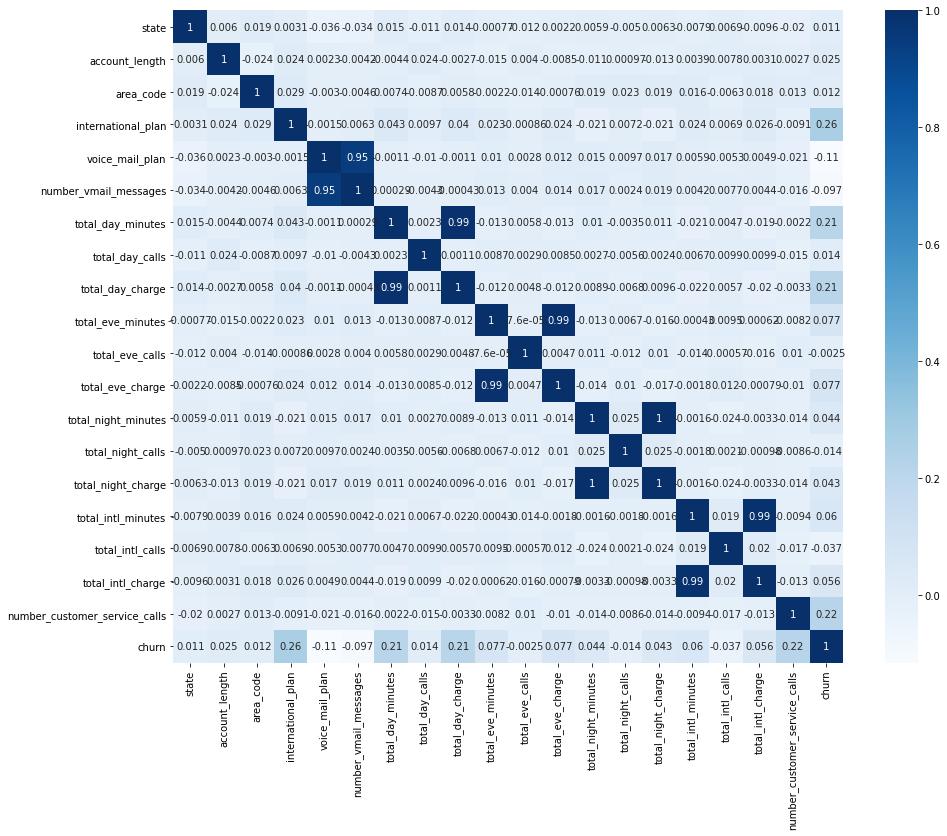

In [122]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_heatmap.corr(), annot=True, cmap = "Blues")

#### _`According to these values above and in the figure below,people will be tend to churn if`_

* **`there is international plan`**
* **`there is number of customer service calls`**
* **`there is total day minutes, total evening minutes and`**
* **`there is total day, total evening and total night charges.`**


### <font color="darkred"> States With Churn or Retained Customer :</font> <a class= "anchor" id="subhead1"></a>

In [123]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=telco_df["state"][telco_df["churn"] == "no"], name="No Churn"))
fig.add_trace(go.Histogram(x=telco_df["state"][telco_df["churn"] == "yes"], name="Churn"))

fig.update_layout(
    title="How many customer move out regarding the country",
   xaxis_title="State")

fig.show()

#### `New Jersey has the maximum percentage of customer churns (27%) followed by Maryland (19%) and Texas(19%).`

In [120]:
trace = []

def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
    
gen_boxplot(telco_df)
data = trace
plotly.offline.iplot(data)

### <font color="darkred"> International Plan vs Churn Rate Relationship:</font> <a class= "anchor" id="subhead1"></a>

In [124]:
telco_df.groupby(['international_plan'])['churn'].value_counts()

international_plan  churn
0                   no       3425
                    yes       429
1                   no        228
                    yes       168
Name: churn, dtype: int64

In [202]:
color_map = {"yes": "#F58518", "no": "#1F77B4"}
fig = px.histogram(telco_df,  
                   x ="international_plan", 
                   color = 'churn', 
                   barnorm = 'percent',
                   title="<b>International Plan distribution vs Churn</b>",
                  color_discrete_map=color_map )
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

#### `As we can see by the above graph the Customer with the international plan tends to churn more frequently, which means the company has to do some changes in their plan or service.`

### <font color="darkred"> Voice Mail Plan vs Churn Rate Relationship:</font> <a class= "anchor" id="subhead2"></a>

In [203]:
pd.crosstab(telco_df['churn'], telco_df["voice_mail_plan"], margins=True)

voice_mail_plan,0.0,1.0,All
churn,,,
no,2621,1032,3653
yes,515,82,597
All,3136,1114,4250


In [204]:
fig = px.histogram(telco_df, 
                   x ="voice_mail_plan", 
                   color='churn', 
                   barnorm = "percent", 
                   color_discrete_map=color_map,
                   title="<b>Voice mail Plan distribution vs Churn</b>")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

#### `Here, Churn rate is higher with customer who haven't opted for voice mail option.`

### <font color="darkred"> Calls to Customer Care vs Churn rate Relationship :</font> <a class= "anchor" id="subhead7"></a>

In [205]:
pd.crosstab(telco_df['churn'], telco_df["number_customer_service_calls"], margins=True)

number_customer_service_calls,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
churn,,,,,,,,,,,
no,788,1358,845,495,119,32,9,6,1,0,3653
yes,98,165,102,63,91,49,19,7,1,2,597
All,886,1523,947,558,210,81,28,13,2,2,4250


In [206]:
fig = px.histogram(telco_df, 
                   color ="churn", 
                   x= "number_customer_service_calls", 
                   barnorm='percent',
                   color_discrete_map=color_map, 
                   title="<b>Calls to Customer Care vs Churn rate</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

#### `Customer with four or more customer service calls churn more than as often as do other customers.`

### <font color="darkred"> Total number of Calls in a day minute/charges vs Churn Rate Relationship:</font> <a class= "anchor" id="subhead4"></a>

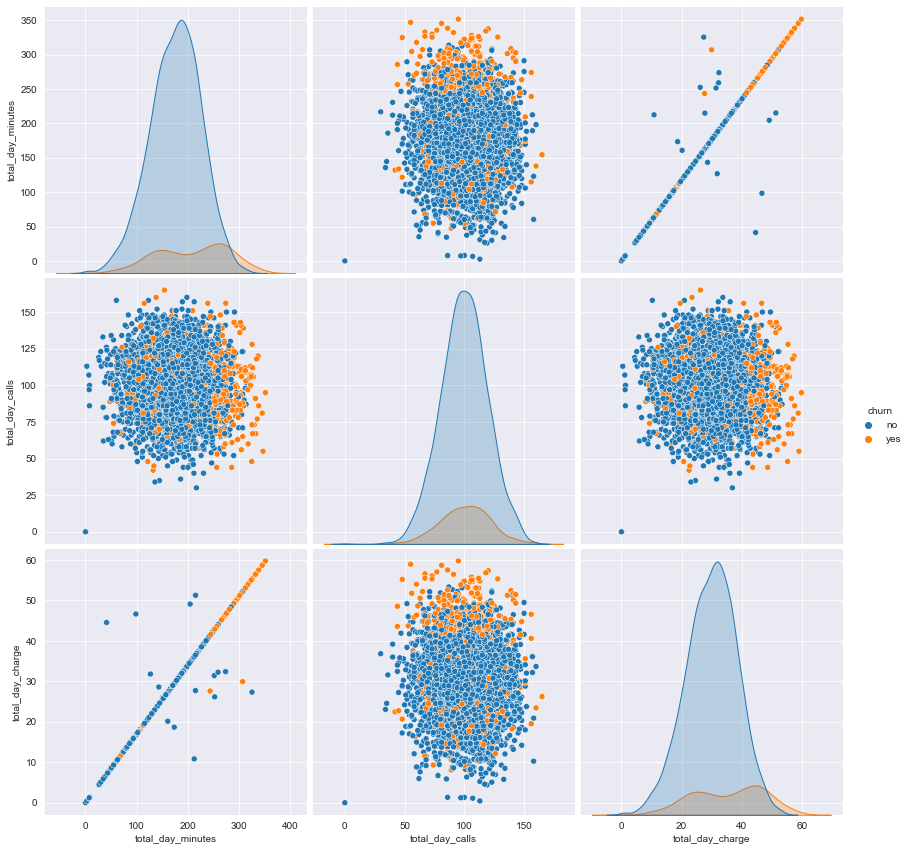

In [235]:
sns.set_style('darkgrid')
sns.pairplot(telco_df, vars = ["total_day_minutes", "total_day_calls", "total_day_charge"], hue = 'churn', height=4)

### <font color="darkred"> Total number of Calls in Evening, minute/charges vs Churn Rate Relationship:</font> <a class= "anchor" id="subhead5"></a>

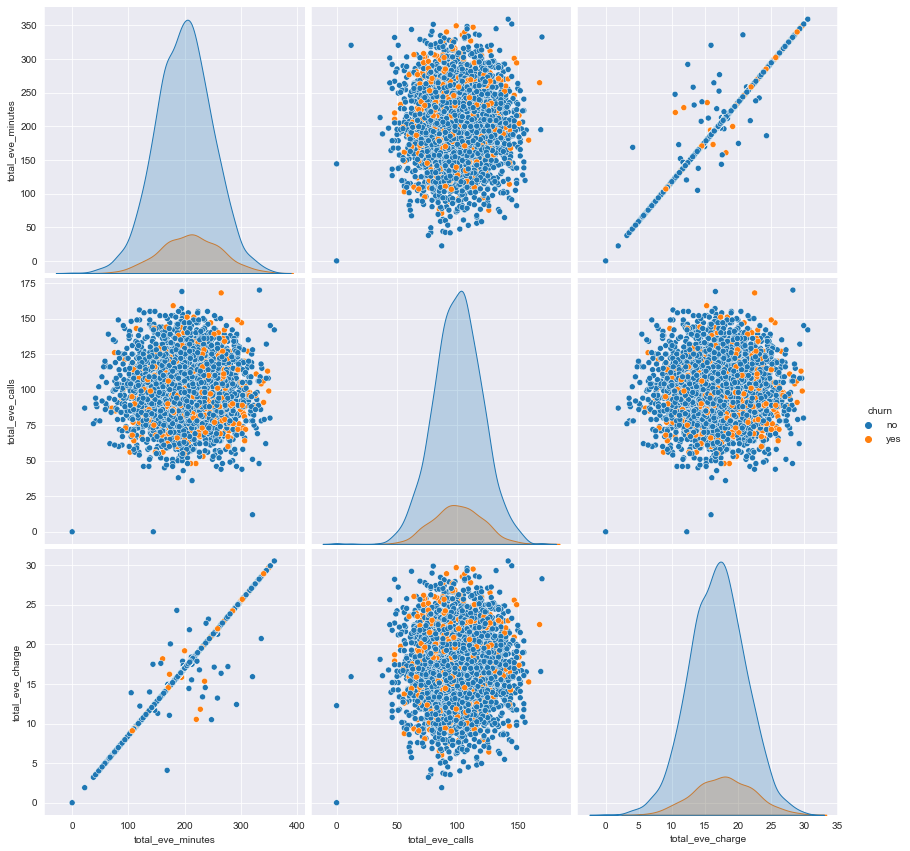

In [236]:
sns.pairplot(telco_df, vars = ["total_eve_minutes", "total_eve_calls", "total_eve_charge"], hue = 'churn', height=4)

### <font color="darkred"> Total number of Calls in night minute/charges vs Churn Rate Relationship:</font> <a class= "anchor" id="subhead6"></a>

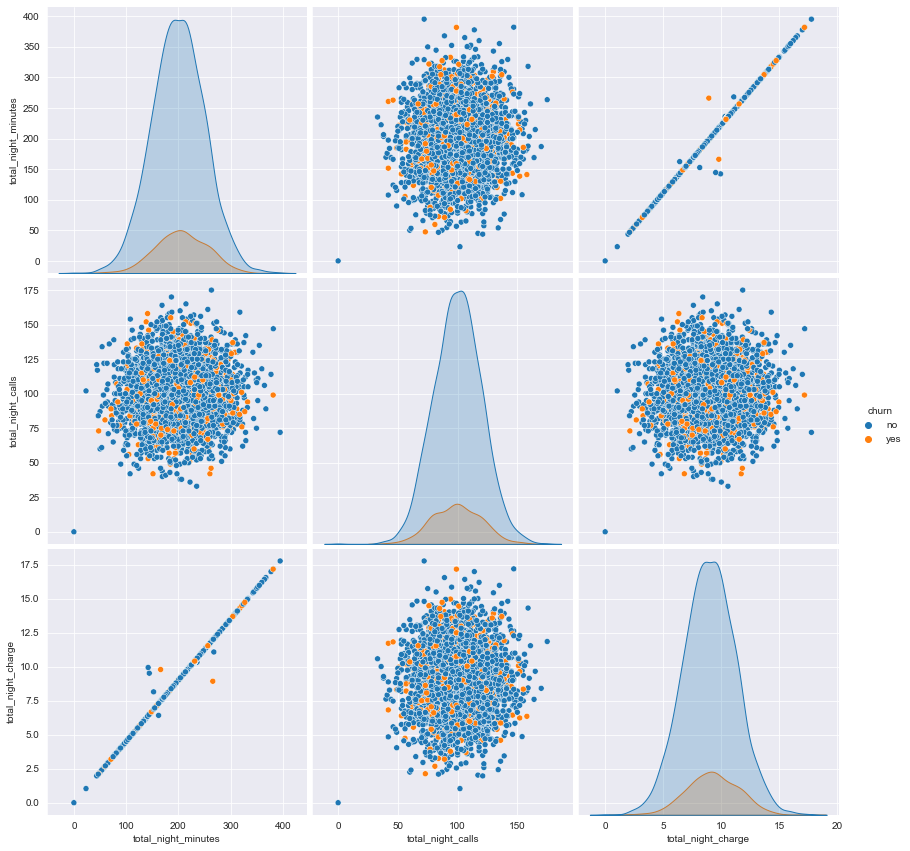

In [237]:
sns.pairplot(telco_df, vars = ["total_night_minutes", "total_night_calls", "total_night_charge"], hue = 'churn', height=4)

## Feature Selection<a class= "anchor" id="h4"></a>

In [238]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [241]:
encoder=LabelEncoder()
telco_df["churn"]=encoder.fit_transform(telco_df["churn"])
telco_df["state"]=encoder.fit_transform(telco_df["state"])
telco_df["area_code"]=encoder.fit_transform(telco_df["area_code"])
telco_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107.0,1,0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
1,31,137.0,1,0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
2,35,84.0,0,1,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
3,36,75.0,1,1,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0
4,19,121.0,2,0,1.0,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0


In [242]:
y = telco_df["churn"] # represents the target column
X = telco_df.drop("churn",axis=1) # X represents all the features

#### apply SelectKBest class to extract top 10 best features


In [243]:
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)

In [244]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#### concat two dataframes for better visualization 

In [245]:
feature_Scores = pd.concat([df_columns,df_scores],axis=1)
feature_Scores.columns = ['Specs','Score']  #naming the dataframe columns

In [246]:
featureScores

,Specs,Score
0,state,4.069585
1,account_length,40.367884
2,area_code,0.320965
3,international_plan,264.111689
4,voice_mail_plan,41.247477
5,number_vmail_messages,953.038382
6,total_day_minutes,3175.294174
7,total_day_calls,3.164935
8,total_day_charge,529.749055
9,total_eve_minutes,317.068866


#### Here are the V.I.F of our dataset

In [247]:
print(featureScores.nlargest(15,'Score')) 

                            Specs        Score
6               total_day_minutes  3175.294174
5           number_vmail_messages   953.038382
8                total_day_charge   529.749055
9               total_eve_minutes   317.068866
3              international_plan   264.111689
18  number_customer_service_calls   225.484508
12            total_night_minutes   103.128176
4                 voice_mail_plan    41.247477
1                  account_length    40.367884
11               total_eve_charge    26.715006
15             total_intl_minutes    11.212261
16               total_intl_calls     8.000929
14             total_night_charge     4.548849
0                           state     4.069585
13              total_night_calls     3.298154
